In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from rich import print as rprint
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../../datasets/train_features.csv')

In [4]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023',
       '1024'],
      dtype='object', length=1025)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,-3.210069,-4.458862,-0.878512,-9.101152,-11.970865,1.784717,2.959738,4.797460,-13.834463,-0.261578,...,3.472469,-5.928474,-1.585344,7.044512,3.351335,2.595461,4.681990,0.276043,-3.234175,2.0
1,-4.577524,-5.676576,-2.340113,-10.764790,-13.815485,2.603069,3.958373,6.244400,-14.038521,-0.366628,...,4.676921,-8.461687,-1.881620,9.183582,3.957644,4.263472,5.924525,0.291932,-4.050914,2.0
2,0.660451,0.264598,1.986459,2.682943,3.441537,-0.483278,-0.000470,-2.272786,5.390817,0.233887,...,0.410656,1.886437,0.972049,-2.938727,-0.221072,-1.883689,0.118852,0.635082,1.586291,1.0
3,-0.585011,-1.931929,2.918542,-5.462645,-7.645029,-0.021875,1.382597,1.764294,-13.119708,0.048759,...,0.767551,-0.621759,-0.289813,2.448361,2.664419,-0.916472,1.891101,0.544798,-1.289092,0.0
4,-3.759083,-4.918644,-1.571457,-9.856080,-12.780863,2.122068,3.415359,5.466081,-13.835334,-0.401230,...,4.043961,-6.606894,-1.719708,7.779760,3.606975,3.311950,5.148464,0.244136,-3.634058,2.0


In [6]:
df.shape

(12000, 1025)

In [7]:
[i for i in df.columns if df[i].isnull().sum() > 0]

[]

In [8]:
[i for i in df.columns if df[i].dtype == 'object']

[]

In [9]:
X = df.drop(['1024'], axis=1)
y = df['1024']

y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
prob = []
correct = []

In [11]:
max_iter_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
l1_ratio_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
train_accuracy = {}
test_accuracy = {}

In [12]:
# Logistic Regression
for max_iter, l1_ratio in zip(max_iter_list, l1_ratio_list):
    model = LogisticRegression(max_iter=max_iter, n_jobs=-1, random_state=42, l1_ratio=l1_ratio)
    model.fit(X_train, y_train)
    y_pred_train = model.predict_proba(X_train)
    prob.append(y_pred_train[np.arange(len(y_train)), y_train])
    correct.append(y_train == np.argmax(y_pred_train, axis=1))
    y_pred = model.predict(X_test)
    train_accuracy[max_iter] = accuracy_score(y_train, np.argmax(y_pred_train, axis=1))
    test_accuracy[max_iter] = accuracy_score(y_test, y_pred)
    rprint(f"Max Iter: {max_iter}, Train Accuracy: {train_accuracy[max_iter]}, Test Accuracy: {test_accuracy[max_iter]}")

Max Iter: 100, Train Accuracy: 0.9801041666666667, Test Accuracy: 0.97875

Max Iter: 200, Train Accuracy: 0.9801041666666667, Test Accuracy: 0.97875

Max Iter: 300, Train Accuracy: 0.980625, Test Accuracy: 0.97875

Max Iter: 400, Train Accuracy: 0.9809375, Test Accuracy: 0.9795833333333334

Max Iter: 500, Train Accuracy: 0.9816666666666667, Test Accuracy: 0.98

Max Iter: 600, Train Accuracy: 0.9817708333333334, Test Accuracy: 0.98

Max Iter: 700, Train Accuracy: 0.981875, Test Accuracy: 0.9804166666666667

Max Iter: 800, Train Accuracy: 0.9825, Test Accuracy: 0.9795833333333334

Max Iter: 900, Train Accuracy: 0.9822916666666667, Test Accuracy: 0.98

In [13]:
max_test_accuracy = max(test_accuracy, key=test_accuracy.get)

In [14]:
prob = np.array(prob)
correct = np.array(correct)

In [15]:
prob = prob.T
correct = correct.T

In [16]:
mean = np.mean(prob, axis=1)
std = np.std(prob, axis=1)
varibility = std / mean

In [17]:
correctness = np.mean(correct, axis=1)

In [18]:
varibility.shape

(9600,)

In [19]:
correctness.shape

(9600,)

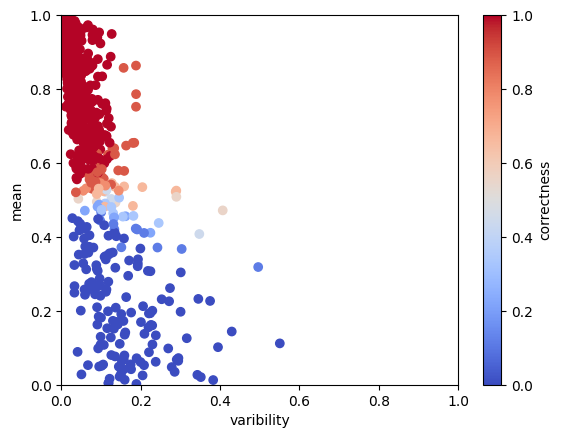

In [20]:
plt.figure()
plt.scatter(varibility, mean, c=correctness, cmap='coolwarm')
plt.colorbar(label = 'correctness')
plt.xlabel('varibility')
plt.ylabel('mean')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [21]:
correctness_min, correctness_max = np.min(correctness), np.max(correctness)

In [22]:
# pick range
correctness_range = [[min_i, min_i + 0.3] for min_i in np.arange(correctness_min, 1.2, 0.3)]
correctness_range

[[0.0, 0.3], [0.3, 0.6], [0.6, 0.8999999999999999], [0.8999999999999999, 1.2]]

In [23]:
pick = []
for j in range(len(correctness_range)):
    pick.append([idx for idx,i in enumerate(correctness) if correctness_range[j][0] <= i < correctness_range[j][1]])

In [24]:
pick_train_x = []
pick_train_y = []
for i in pick:
    pick_train_x.append(X_train.iloc[i, :])
    pick_train_y.append(y_train.iloc[i])

In [25]:
def decrease_max_iter(index:int) -> int:
    base = 1300
    return max(100, base - index * 300)

def decrease_l1_ratio(index:int) -> float:
    base = 0.9
    return max(0.1, base - index * 0.2)

In [26]:
model_list = []
for idx in range(len(pick_train_x)):
    model = LogisticRegression(max_iter=decrease_max_iter(idx), n_jobs=-1, random_state=42, l1_ratio=decrease_l1_ratio(idx))
    print(f"Model {idx} is training", end="\r")
    if len(pick_train_x[idx]) == 0:
        print(f"Model {idx} is skipped     ")
        continue
    model.fit(pick_train_x[idx], pick_train_y[idx])
    model_list.append(model)
    print(f"Model {idx} is trained     ")

Model 0 is trained     
Model 1 is trained     
Model 2 is trained     
Model 3 is trained     


In [27]:
# Ensemble
from sklearn.ensemble import VotingClassifier

model_list = [(f"model_{idx}", model) for idx, model in enumerate(model_list)]
rprint(model_list)

vc = VotingClassifier(estimators=model_list, n_jobs=-1)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
vc_acc = accuracy_score(y_test, y_pred)
rprint(f"Ensemble Accuracy: {vc_acc}")

[
    ('model_0', LogisticRegression(l1_ratio=0.9, max_iter=1300, n_jobs=-1, random_state=42)),
    ('model_1', LogisticRegression(l1_ratio=0.7, max_iter=1000, n_jobs=-1, random_state=42)),
    ('model_2', LogisticRegression(l1_ratio=0.5, max_iter=700, n_jobs=-1, random_state=42)),
    (
        'model_3',
        LogisticRegression(l1_ratio=0.29999999999999993, max_iter=400, n_jobs=-1,
                   random_state=42)
    )
]

Ensemble Accuracy: 0.9804166666666667

In [28]:
rprint(f"提升 {((vc_acc / max_test_accuracy) - 1 ) * 100:.4f} %") if vc_acc > max_test_accuracy else rprint("沒有提升")

沒有提升

In [29]:
vc

VotingClassifier(estimators=[('model_0',
                              LogisticRegression(l1_ratio=0.9, max_iter=1300,
                                                 n_jobs=-1, random_state=42)),
                             ('model_1',
                              LogisticRegression(l1_ratio=0.7, max_iter=1000,
                                                 n_jobs=-1, random_state=42)),
                             ('model_2',
                              LogisticRegression(l1_ratio=0.5, max_iter=700,
                                                 n_jobs=-1, random_state=42)),
                             ('model_3',
                              LogisticRegression(l1_ratio=0.29999999999999993,
                                                 max_iter=400, n_jobs=-1,
                                                 random_state=42))],
                 n_jobs=-1)